In [1]:
import secret_id

Importando a biblioteca spotipy para se conectar a API do spotify e conseguir os dados das músicas da playlist.

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

cid = secret_id.spotify_cid # Client ID;
secret = secret_id.spotify_secret # Client Secret; 
username = secret_id.spotify_username # Spotify username

scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri = secret_id.spotify_uri # Paste your Redirect URI here

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

Criando um dataframe a partir da playlist "Presença Hip Hop"(https://open.spotify.com/playlist/37i9dQZF1DX0jAiO33gxlI) com o título da música como índice e coluna 'first_artist' com o primeiro artista listado no spotify.

In [3]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = '37i9dQZF1DX0jAiO33gxlI'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []
track_first_artist = []

for i in range(0, len(songs)):
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    if songs[i]['track']['artists'][0]['name'] == 'Pineapple StormTv':
        track_first_artist.append(songs[i]['track']['artists'][1]['name'])
    else:
        track_first_artist.append(songs[i]['track']['artists'][0]['name'])
       
playlist_df = pd.DataFrame(track_first_artist, index = track_names,columns=['first_artist'])

In [4]:
playlist_df.head()

,first_artist
"Tragos, Balas e Taças de Vinho",Menestrel
Praya,JayA Luuck
Linda e Doida,Felp 22
Vergonha Pra Mídia 2 - O Retorno do Jedi,Salvador Da Rima
Reflexo,MC Cabelinho


Importando a biblioteca lyricsgenius para se conectar a API do Genius onde será recuperado a letra das músicas.

In [5]:
import lyricsgenius as genius

genius = genius.Genius(secret_id.genius_id)
genius.remove_section_headers = True

Criando uma lista onde serão armazenadas as letras das músicas. Caso alguma letra não seja encontrada uma string vazia é adicionada

In [6]:
lyrics = []
for i in range(playlist_df.shape[0]):
    song_title = playlist_df.index[i]
    artist_name = playlist_df.iloc[i][0]
    song = genius.search_song(song_title, artist_name)
    try:
        lyrics.append(song.lyrics)
    except:
        lyrics.append('')

Searching for "Tragos, Balas e Taças de Vinho" by Menestrel...
Done.
Searching for "Praya" by JayA Luuck...
Done.
Searching for "Linda e Doida" by Felp 22...
Done.
Searching for "Vergonha Pra Mídia 2 - O Retorno do Jedi" by Salvador Da Rima...
Done.
Searching for "Reflexo" by MC Cabelinho...
Done.
Searching for "LoveSong" by Ebony...
Done.
Searching for "Vivência" by Ramonzin...
Done.
Searching for "Psicose" by Hungria Hip Hop...
Done.
Searching for "The Cypher Deffect 2" by Costa Gold...
Done.
Searching for "kelefeeling (verso livre)" by Don L...
Done.
Searching for "Tipo Rei" by Jota Jr...
Done.
Searching for "Eminente" by Rap Box...
Done.
Searching for "Salmo 23" by Projota...
Done.
Searching for "Só Uma Noite" by Fabio Brazza...
Done.
Searching for "Mudanças" by Choice...
Done.
Searching for "Voz Ativa" by Dexter...
Done.
Searching for "Homem de Lata" by Doncesão...
Done.
Searching for "Sonho das Esquinas" by BK...
Done.
Searching for "Do Alto do Morro" by César Mc...
Done.
Searchi

Checando a primeira letra da lista.

In [7]:
lyrics[0]

'Não caio nesse joguinho\nSou 100% visceral\nTragos balas e taças de vinho\nColar e brilhos, meu mundo\u2005é\u2005ilegal\n\nGangster original gosta\u2005de grana e a única selfie\u2005é do passaporte\nTipo frase de para-lama: "ou você tem bala\u205fou\u205fvocê\u205ftem sorte"\nMene chave\u205fo gordão das\u205fárea\' com a gig mais gangue, só carão de morte\nSe assombrar pro big o tempo fecha, mó climão de chuva papo 0 ibope\nOlha o pingentão, tamo 100%\nFora os adverso\', baby\nToda guerra é suja, lavemos as mãos\nVocê olhou e pediu joga o time dentro\nSente o feeling\nVive a trama\nÉ de prima sente a rima isso é rua nas minhas veias\nNão se cansa\nEla gosta disso quer viver o drama\nBon vivant by BSB, bem talentoso em não cair da prancha\n\nNão caio nesse joguinho\nSou 100% visceral\nTragos balas e taças de vinho\nColar e brilhos, meu mundo é ilegal\nOlha mãe, comprei um tênis novo\nOlha mãe, o meu carro novo\nOlha mãe, ouro no pescoço\nO seu filho garante conforto\nPra famíli

Adicionando as letras como uma coluna do dataframe.

In [8]:
playlist_df['lyrics'] = lyrics
playlist_df.head()

,first_artist,lyrics
"Tragos, Balas e Taças de Vinho",Menestrel,Não caio nesse joguinho\nSou 100% visceral\nTr...
Praya,JayA Luuck,"Pedro Lotto\nIsso, meu pivete, tá ligado não?\..."
Linda e Doida,Felp 22,"Haha, Felp22, baby\nQue que 'cê quer fumar? Qu..."
Vergonha Pra Mídia 2 - O Retorno do Jedi,Salvador Da Rima,Recalcado vai cair de costa'\nQuando reparar q...
Reflexo,MC Cabelinho,"BK', Cabelinho, Bloco 7\nÉ o rap, é o funk\nAi..."


Importando bibliotecas para criar e visualizar uma nuvem de palavras;

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

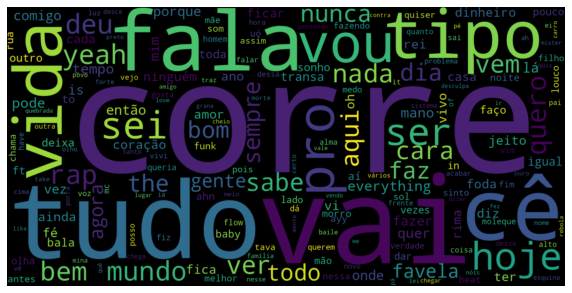

In [10]:
# Concatenando todas as letras em uma única string
all_summary = " ".join(s for s in lyrics)

# Criando lista de stopwords e adicionando algumas palavras à ela.
stopwords = stopwords.words('portuguese')
stopwords.extend(['pra','tá','tô','tão'])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black", 
                      width=1600, height=800, collocations=False).generate(all_summary.lower())

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()